# House Price Prediction using Artificial Neural networks

## Context:
    
This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.


The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.


## Content:
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

longitude

latitude

housingmedianage

total_rooms

total_bedrooms

population

households

median_income

medianhousevalue

ocean_proximity


## Acknowledgements
This data was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

and I encountered it in 'Hands-On Machine learning with Scikit-Learn and TensorFlow' by Aurélien Géron.
Aurélien Géron wrote:
This dataset is a modified version of the California Housing dataset available from:
Luís Torgo's page (University of Porto)

#### Importing the required libraries:

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_rows=None
pd.options.display.max_columns=None

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
import pydot,graphviz

import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Loading the dataset:

In [2]:
housing=sklearn.datasets.fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

#### Independent features:

In [3]:
housing_data=pd.DataFrame(data=housing.data,columns=['MedInc','HouseAge','AveRooms','AveBedrms','Population',
'AveOccup','Latitude','Longitude'])
housing_data.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [ ]:
housing_data.shape

* No of records : 20640
* No of attributes : 8

In [4]:
housing_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


#### Target feature:

In [5]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

## Data Pre-Processing:
#### Checking and treating duplicate values:

In [6]:
count=housing_data.isna().sum()
percent=((count/housing_data.shape[0])*100)
null=pd.DataFrame(pd.concat([count,percent],keys=['Missing values','% Missing values'],axis=1))
null

,Missing values,% Missing values
MedInc,0,0.0
HouseAge,0,0.0
AveRooms,0,0.0
AveBedrms,0,0.0
Population,0,0.0
AveOccup,0,0.0
Latitude,0,0.0
Longitude,0,0.0


* No null values exist in the dataset.

#### Checking the duplicate values:

In [7]:
housing_data.duplicated().sum()

0

* No duplicate values exist.

#### Checking the symmetry of the data:

MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
dtype: float64 



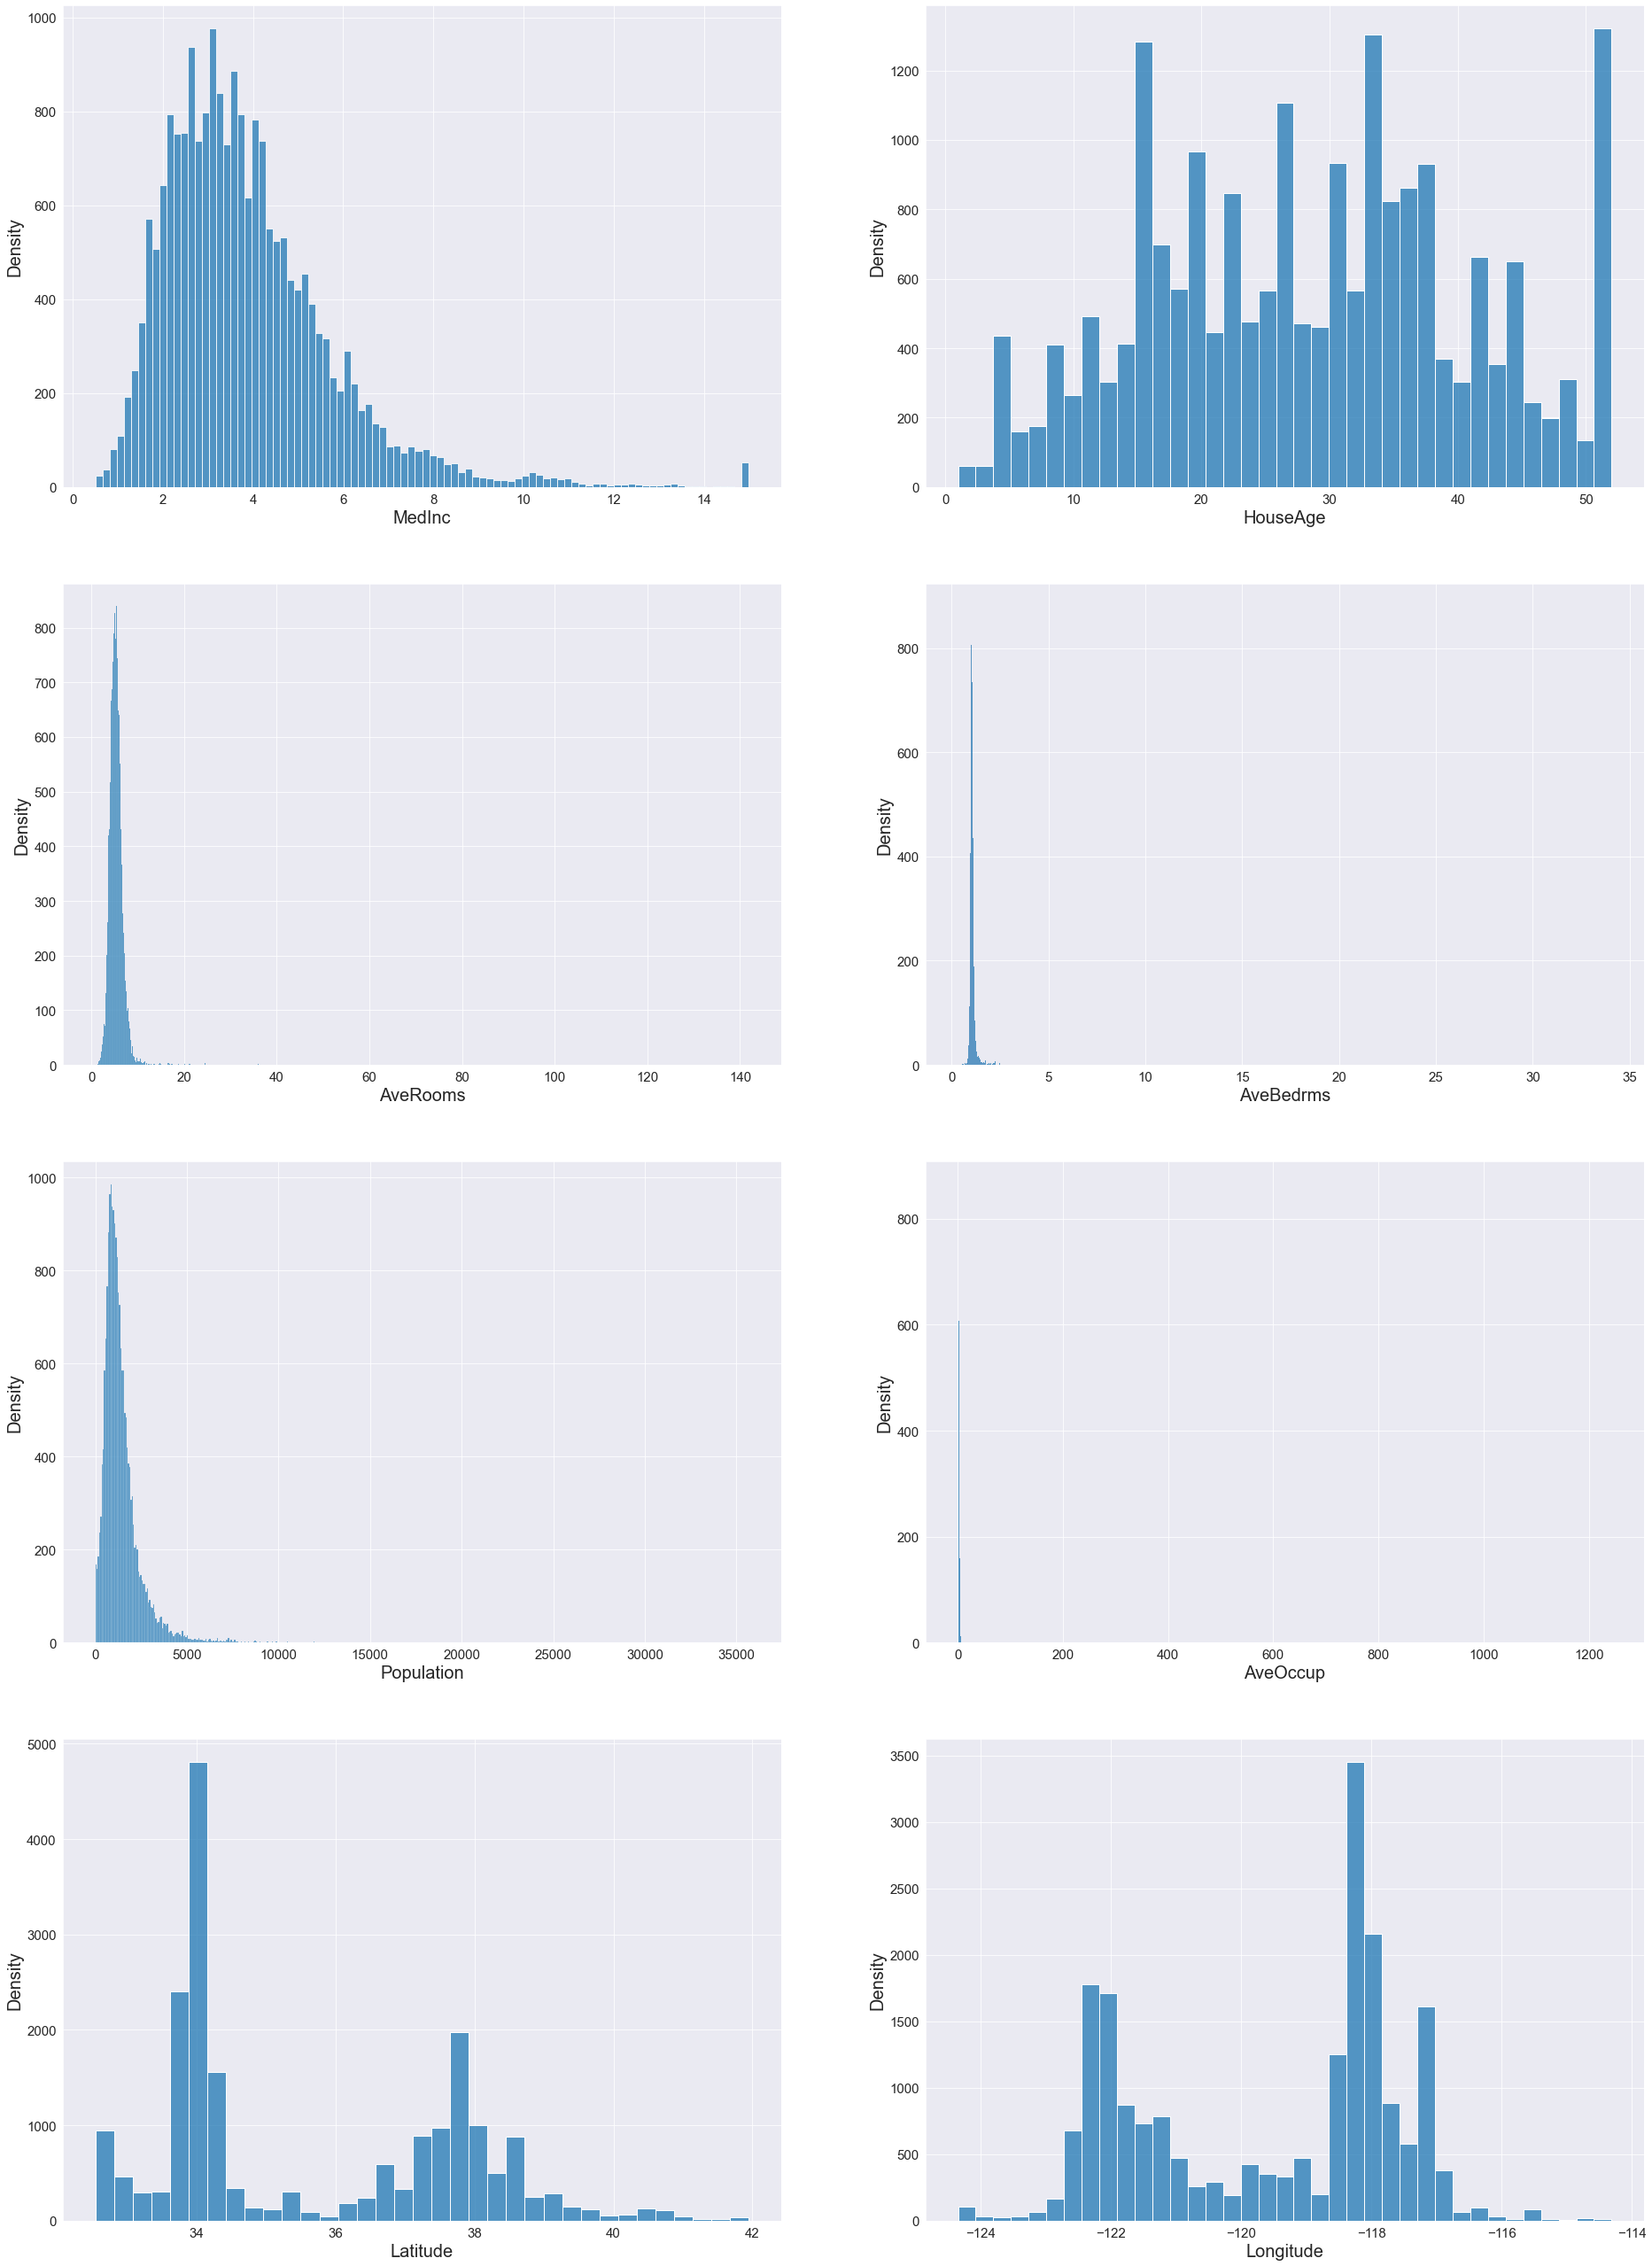

In [8]:
print(housing_data.skew(),'\n')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize']=[32,46]
j=1
for i in housing_data.columns:
    plt.subplot(4,2,j)
    sns.histplot(housing_data[i])
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Density',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    j+=1
plt.show()

* The following features have positive skewness:
    
        MedInc,AveRooms,AveBedrms,Population,AveOccup

## Exploratory Data Analysis:

#### Distribution of all the features:

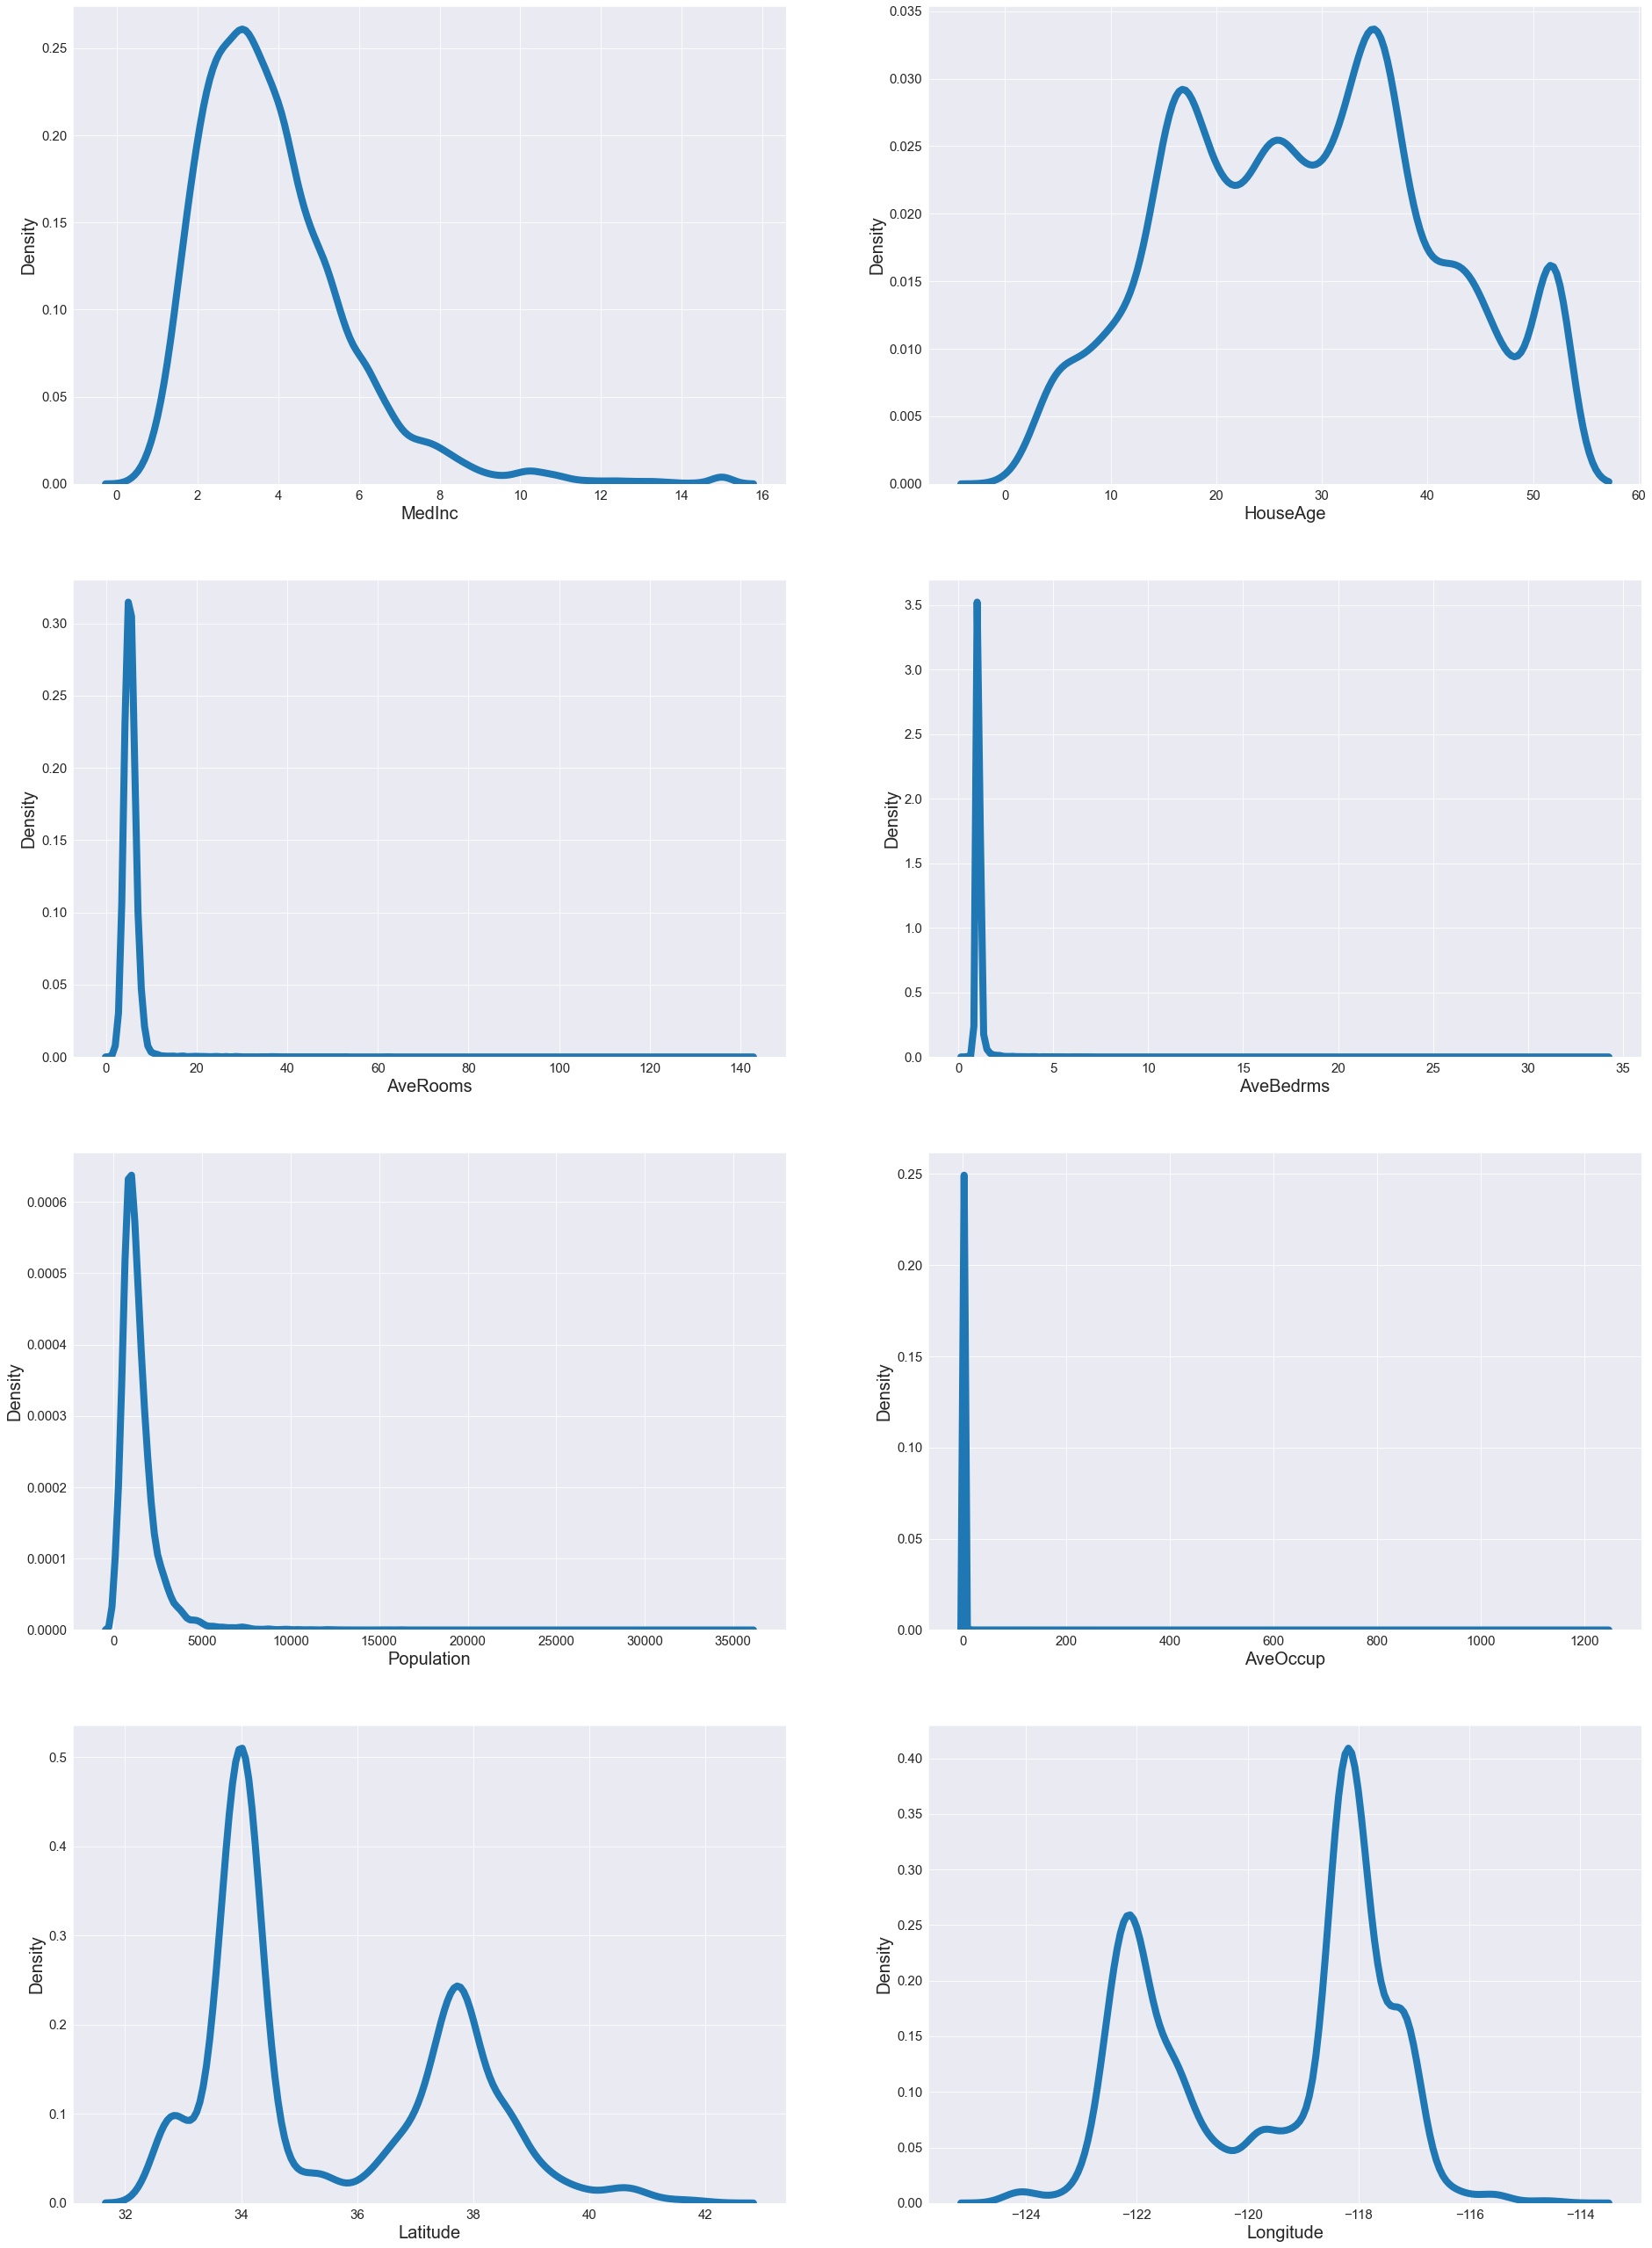

In [9]:
j=1
for i in housing_data.columns:
    plt.subplot(4,2,j)
    sns.kdeplot(housing_data[i],linewidth=8)
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Density',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    j+=1
plt.show()

#### Pairplot Visualisation:

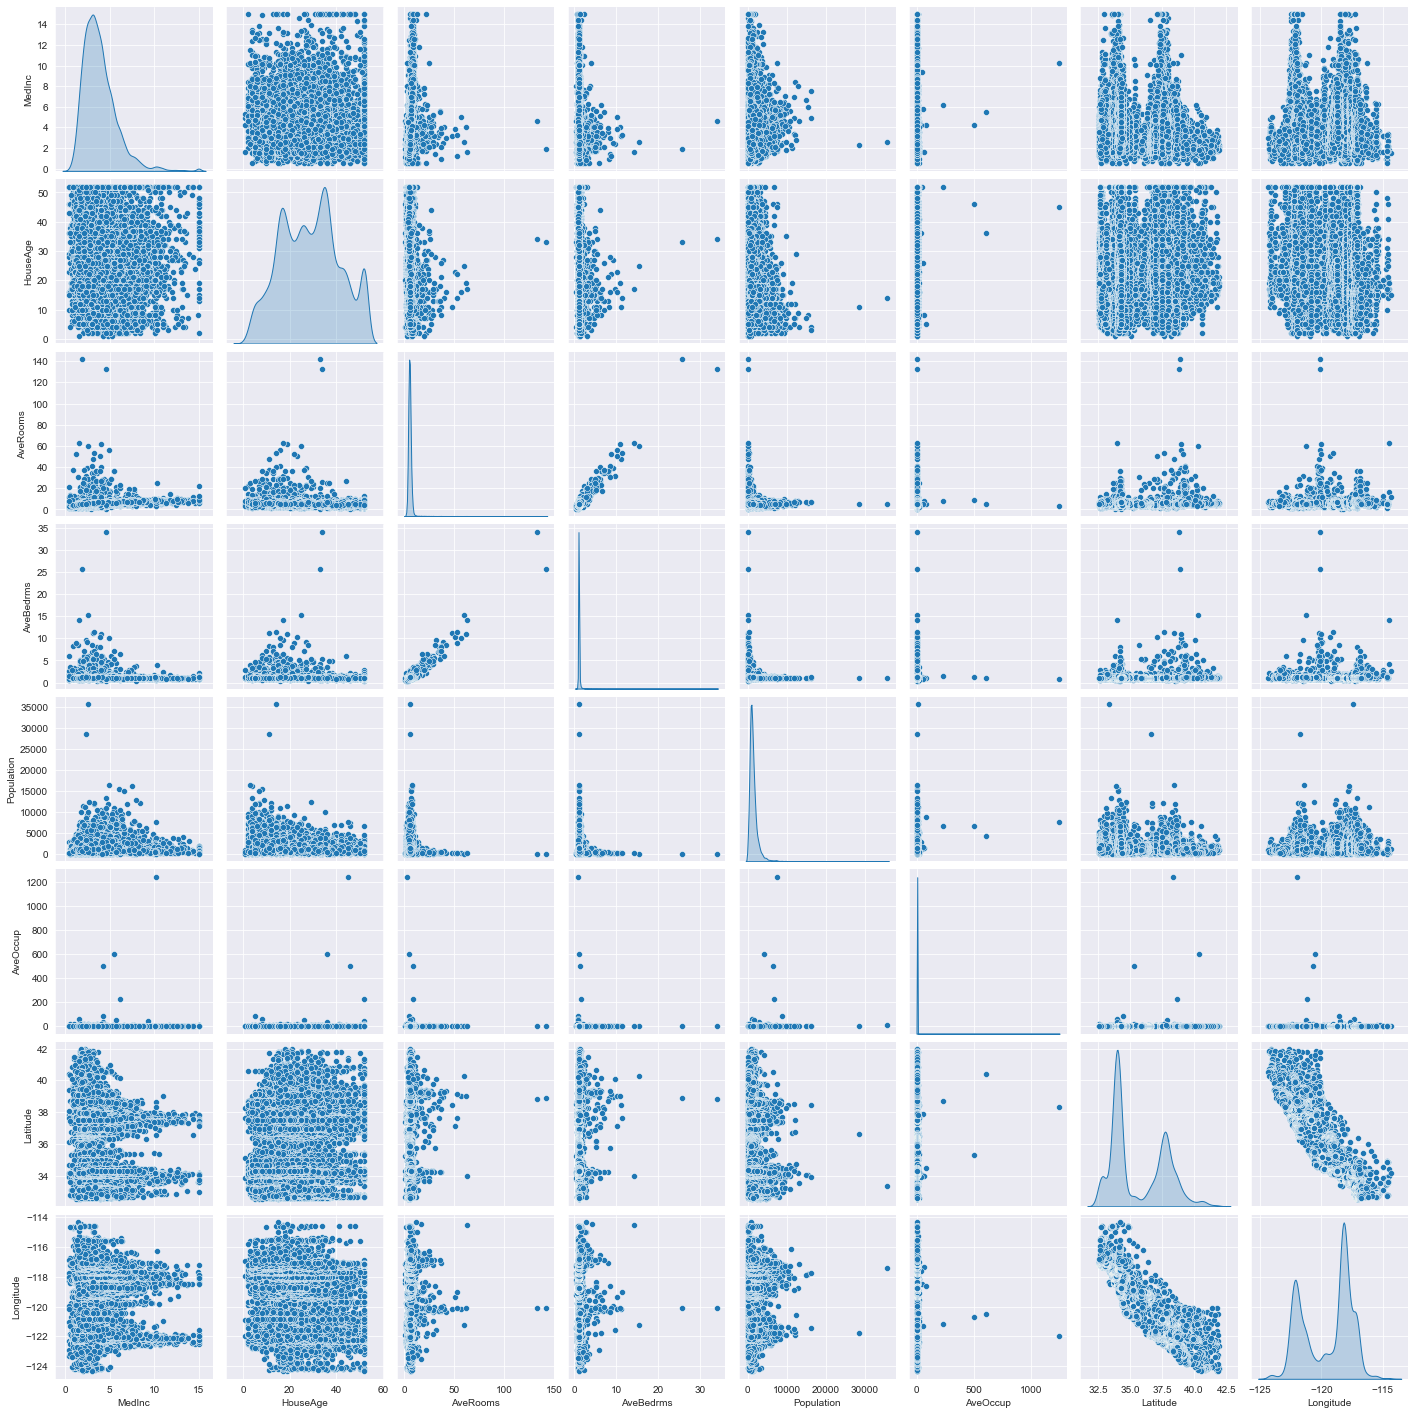

In [10]:
plt.rcParams['figure.figsize']=[15,13]
sns.pairplot(data=housing_data,diag_kind='kde',palette='orange')
plt.show()

#### Visualisation of Spread:

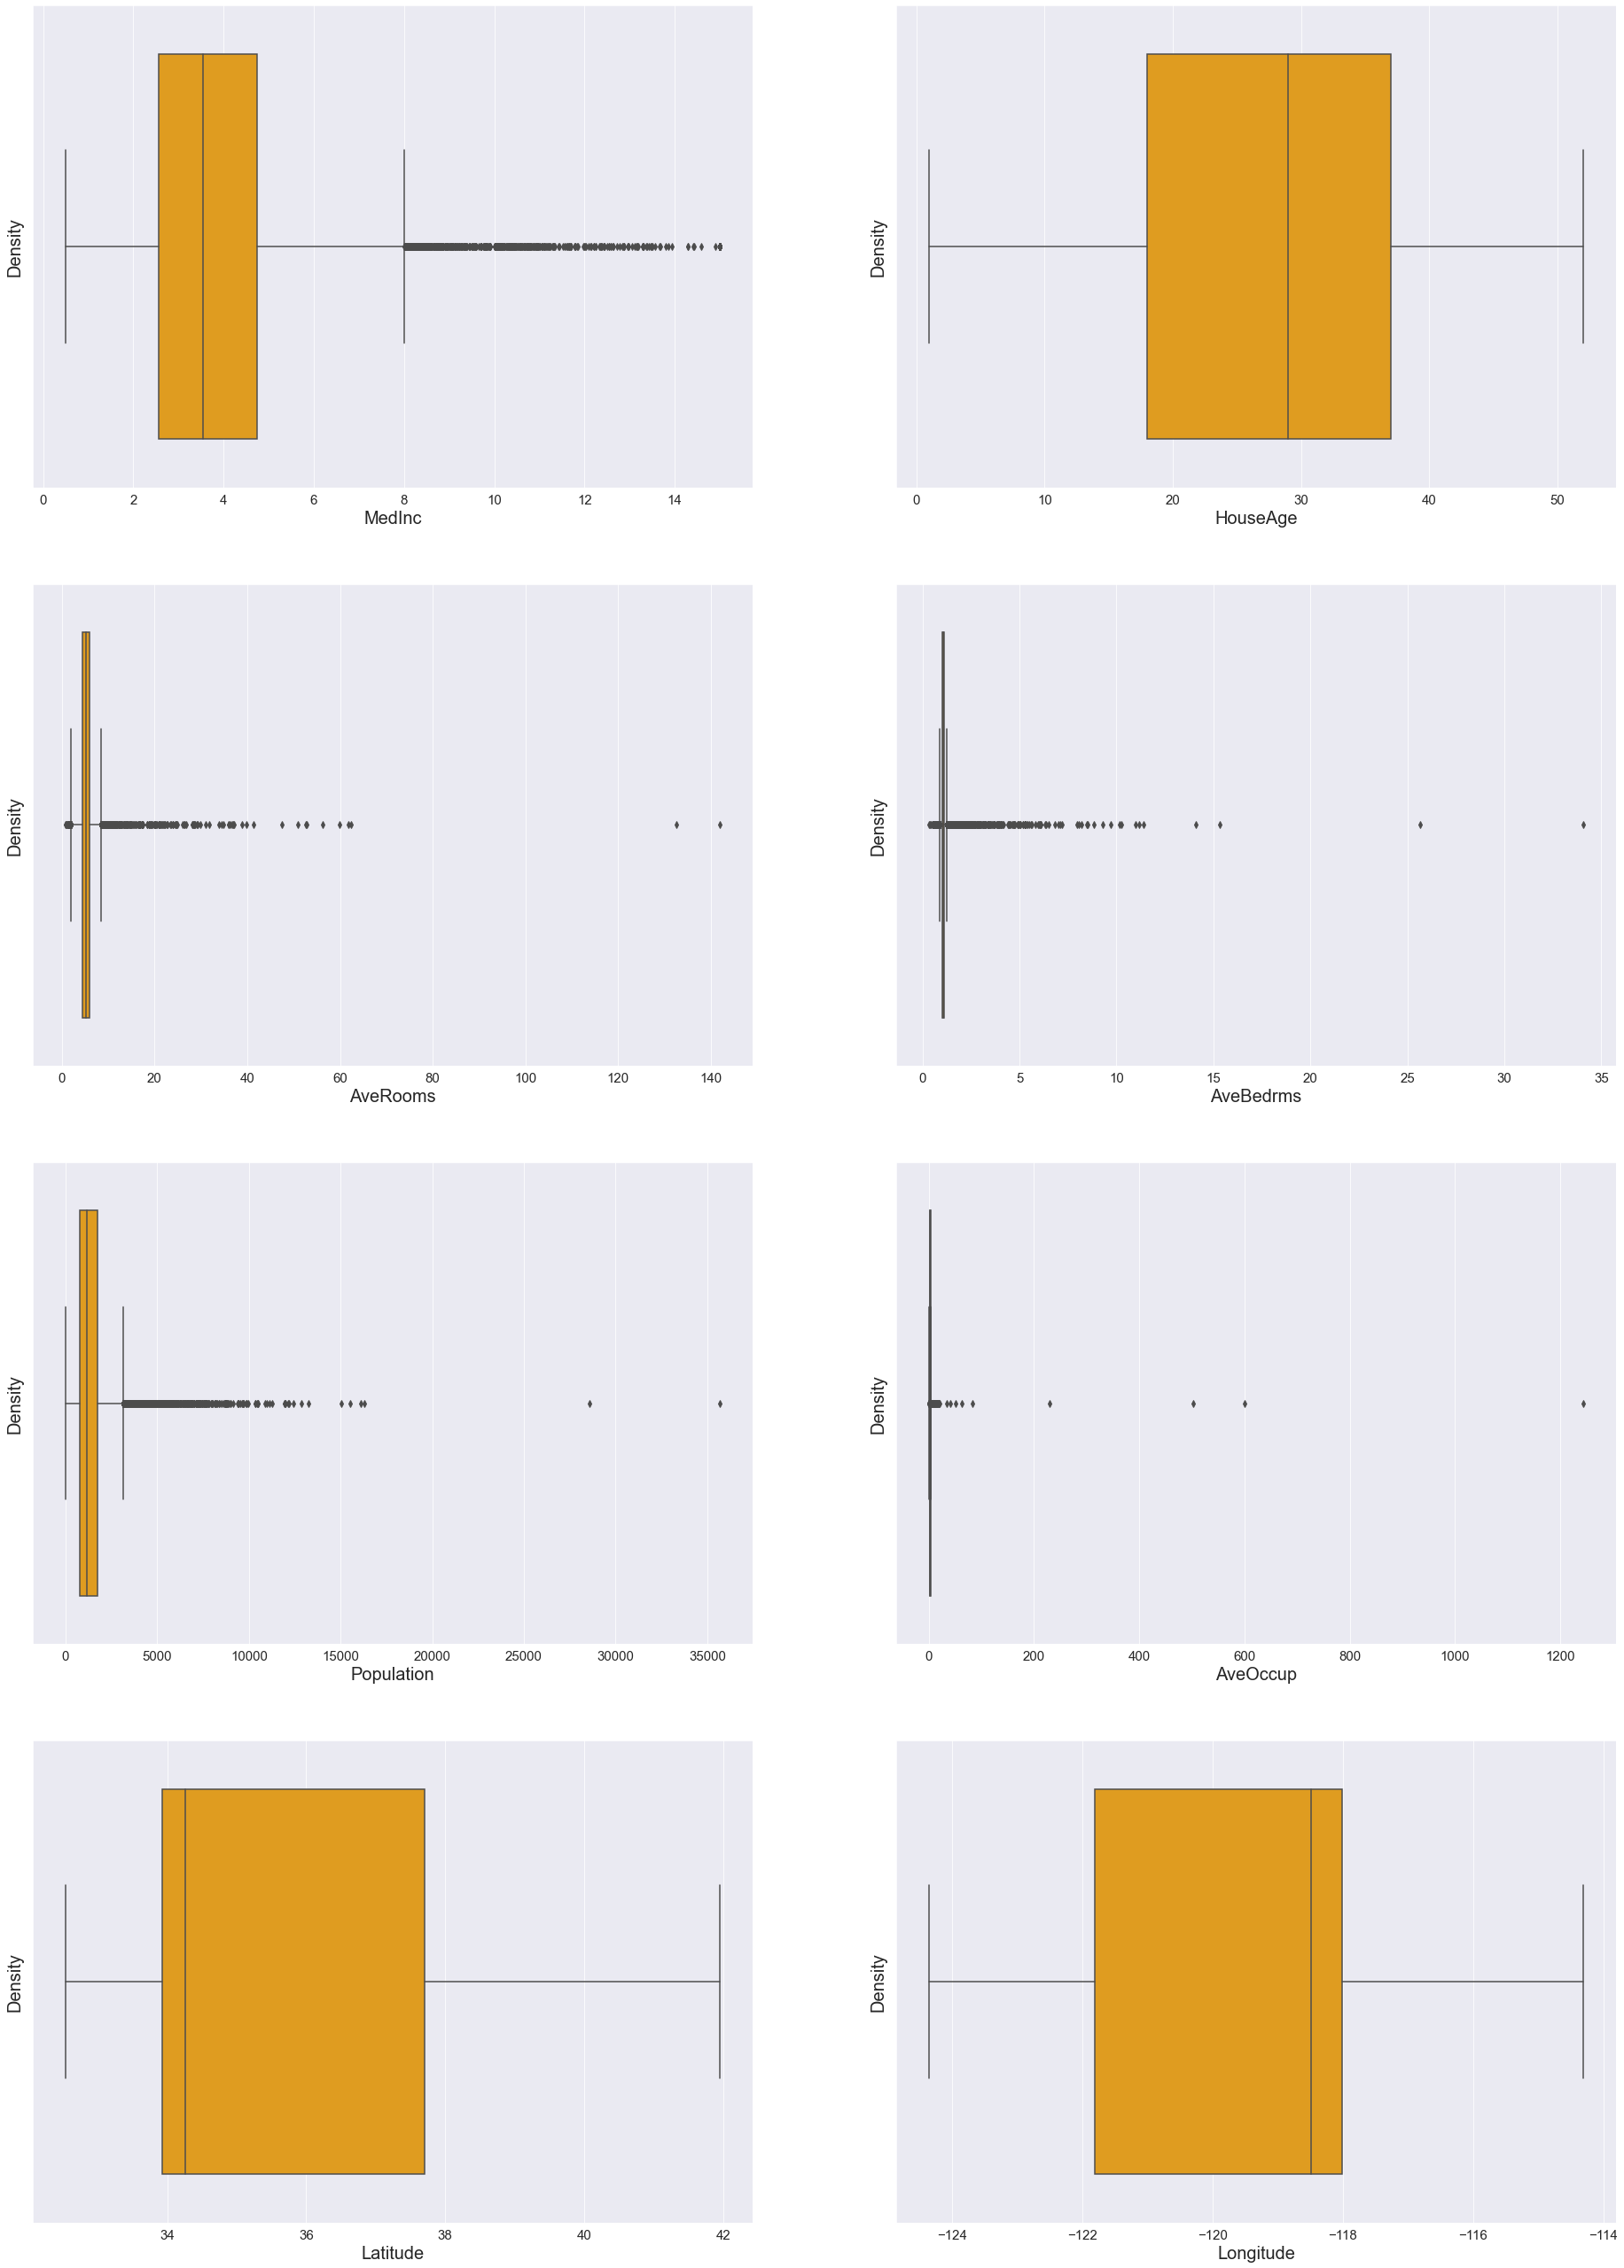

In [11]:
plt.rcParams['figure.figsize']=[32,46]
j=1
for i in housing_data.columns:
    plt.subplot(4,2,j)
    sns.boxplot(x=housing_data[i],color='orange')
    plt.xlabel(i,fontsize=20)
    plt.ylabel('Density',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    j+=1
plt.show()

#### Train/Test/Validation datasets:

In [12]:
X_trainfull,X_test,y_trainfull,y_test=train_test_split(housing_data,housing.target,random_state=42)
X_train, X_valid, y_train, y_valid=train_test_split(X_trainfull,y_trainfull,random_state=42)

#### Feature Scaling:

In [13]:
SS=StandardScaler()
X_train=SS.fit_transform(X_train)
X_valid=SS.transform(X_valid)
X_test=SS.transform(X_test)

#### Building the ANN model:

In [14]:
np.random.seed(42)
tf.random.set_seed(42)
model=keras.models.Sequential()
model.add(keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(30,activation='relu'))
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


2021-12-15 00:12:41.727812: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
for i in [1,2]:
    weights, biases = model.layers[1].get_weights()
    print(f'Weights assigned to {i} hidden layer : ',weights)
    print(f'Biases obtained in {i} hidden layer : ',biases,'\n')

Weights assigned to 1 hidden layer :  [[ 0.11883286 -0.00981644  0.27258477 -0.1567307   0.1461946   0.24828193
   0.2825484   0.15769273 -0.0953387   0.02984086 -0.1507749   0.12481081
  -0.24056977  0.02203694  0.13591266  0.23718205 -0.10139847 -0.206322
  -0.03677598  0.25350466 -0.22892447 -0.23895451  0.0477182   0.27936706
   0.26478288  0.06140178  0.07016981  0.20293137  0.21041659  0.24766001]
 [-0.30751744 -0.00121769  0.04745734  0.11739606  0.16426632  0.2586389
  -0.05755207  0.23812923  0.02460268 -0.04595992 -0.0625037   0.10513464
  -0.21283352 -0.20099282  0.2975082  -0.27739668  0.01919341  0.30800548
  -0.01600462  0.23064098 -0.18783253 -0.24382138 -0.09423432  0.11527884
  -0.20169723  0.20007607  0.09898975  0.26931575 -0.16496243  0.21288183]
 [-0.28608954  0.19018927  0.20866397 -0.22560719  0.22875145  0.29770955
   0.11255136  0.04055572  0.07929096  0.23104605 -0.21437353 -0.24601656
   0.0736635   0.0654946   0.08246386  0.01347181  0.20153973 -0.18613186
 

#### Compiling and Training the Neural network model:

In [16]:
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics='mae')
model_history=model.fit(X_train,y_train,epochs=60,validation_data=(X_valid,y_valid))

Epoch 1/60
363/363 [==============================] - 1s 1ms/step - loss: 0.6710 - mae: 0.5744 - val_loss: 0.7168 - val_mae: 0.4724
Epoch 2/60
363/363 [==============================] - 0s 1ms/step - loss: 0.4325 - mae: 0.4700 - val_loss: 1.6976 - val_mae: 0.4650
Epoch 3/60
363/363 [==============================] - 0s 1ms/step - loss: 0.4298 - mae: 0.4605 - val_loss: 2.8618 - val_mae: 0.4653
Epoch 4/60
363/363 [==============================] - 0s 1ms/step - loss: 0.3919 - mae: 0.4416 - val_loss: 2.1983 - val_mae: 0.4516
Epoch 5/60
363/363 [==============================] - 0s 1ms/step - loss: 0.3810 - mae: 0.4323 - val_loss: 1.3564 - val_mae: 0.4447
Epoch 6/60
363/363 [==============================] - 0s 1ms/step - loss: 0.3731 - mae: 0.4285 - val_loss: 0.3603 - val_mae: 0.4161
Epoch 7/60
363/363 [==============================] - 1s 1ms/step - loss: 0.3661 - mae: 0.4259 - val_loss: 0.3702 - val_mae: 0.4136
Epoch 8/60
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [18]:
print(model_history.history)
print(model_history.params,'\n')

{'loss': [0.6709712147712708, 0.43245619535446167, 0.4297976791858673, 0.39193159341812134, 0.38099291920661926, 0.3730863332748413, 0.3661275804042816, 0.351045161485672, 0.34617874026298523, 0.3429151177406311, 0.34032201766967773, 0.3383384943008423, 0.334166556596756, 0.3312091529369354, 0.33051759004592896, 0.3275490403175354, 0.3272683620452881, 0.32517606019973755, 0.3265475034713745, 0.3257633447647095, 0.31795787811279297, 0.3148247301578522, 0.31278786063194275, 0.31510645151138306, 0.31677478551864624, 0.30905163288116455, 0.3142852485179901, 0.31218141317367554, 0.3116548955440521, 0.30693235993385315, 0.3105156123638153, 0.3037606477737427, 0.30298468470573425, 0.29977312684059143, 0.30241677165031433, 0.30126312375068665, 0.2974894642829895, 0.2945404052734375, 0.3023998737335205, 0.29865866899490356, 0.2983331084251404, 0.29562121629714966, 0.2915711998939514, 0.2935965359210968, 0.2907772660255432, 0.2899530231952667, 0.29508867859840393, 0.29208728671073914, 0.29952645

#### Plotting the loss and accuracy against epoch:

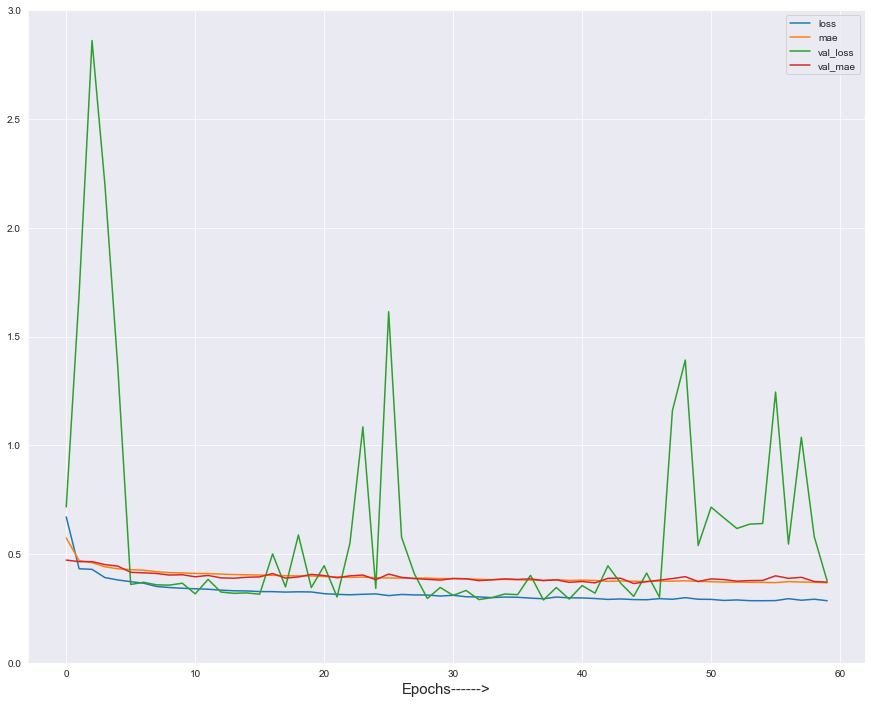

In [24]:
sns.set_style('darkgrid')
pd.DataFrame(model_history.history).plot(figsize=(15,12))
plt.grid(True,which='major',axis='both')
plt.gca().set_ylim(0,3)
plt.xlabel('Epochs------>',fontsize=15)
plt.show()

#### Evaluate the model accuracy on the test dataset:

In [27]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 912us/step - loss: 0.2892 - mae: 0.3746


[0.28922778367996216, 0.3746277987957001]

#### House Price Prediction on first 20 data points from testing set:

In [51]:
X_new=X_test
y_pred=model.predict(X_new)
print('Predicted price : ',y_pred)

Predicted price :  [[0.68891346]
 [1.3374891 ]
 [4.798723  ]
 ...
 [1.4465959 ]
 [2.467938  ]
 [4.2091217 ]]


#### Comaparison with Test data:

In [52]:
y_pred = y_pred.flatten()
y_pred.shape

(5160,)

In [58]:
data=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred,'Variance ':y_test-y_pred})
data.sample(20)

,Actual Price,Predicted Price,Variance
2387,1.67900,2.051903,-0.372903
3525,1.98100,2.835328,-0.854328
654,1.38500,1.628425,-0.243425
1084,1.66300,1.643446,0.019554
2516,0.92000,1.642270,-0.722270
2498,1.60300,1.309226,0.293774
3604,2.66900,2.587314,0.081686
1539,0.47000,0.746559,-0.276559
2470,4.52300,3.606364,0.916636
3264,4.82900,3.949522,0.879478
